In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics.pairwise import euclidean_distances
import scipy.linalg as la

In [3]:
x0= np.loadtxt("linear_vectorfield_data_x0.txt")
x1= np.loadtxt("linear_vectorfield_data_x1.txt")

In [21]:
N =1000
delta_t =0.1
v = x1-x0
x0_inv = np.linalg.pinv(x0)
A= v.T@x0_inv.T


In [22]:

print(A.shape)

(2, 2)


In [23]:
def solve_2D(A, name="int.png",start=[], max_time=4.0):
    #fig, ax = plt.subplots()
    
    N = len(start)

    #colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    def fx(t, x_y):
        """Compute the time-derivative of a system."""
        fx = A @ x_y
        return fx
    
    
    # Solve for the trajectories
    t = np.arange(0,100,0.1)
    #t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=fx, t_span=[0, 1000], y0=val, t_eval=t) for val in start])
    
    """
    for i in range(N):
        x = x_t[i].y[0, :]
        y = x_t[i].y[1, :]
        lines = ax.plot(x, y, '-', color=colors[i])
        plt.setp(lines, linewidth=2)

    title = r'$x0 = {0}$'.format(start)
    plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    #plt.savefig(name, format="png")
    plt.show()
    """
    return t, x_t


In [24]:
t, x_t = solve_2D(A,start=x0)


In [27]:
mse = []
edu_dist = 0
for j in range(N):
    x_esti = x_t[j].y.T
    eu_dist =0
    for i in range(N):
        eu_dist += np.sqrt((x_esti[i][0]-x1[i][0])**2 + (x_esti[i][1]-x1[i][1])**2)
    mse.append(eu_dist/N)
print(min(mse))

0.7151137074970189


In [28]:
mse = []
for j in range(N):
    x_esti = x_t[j].y.T
    mse.append((np.square( x_esti- x1)).mean(axis=None))
print(min(mse))

0.291408150115666


In [10]:
print(x_t[0].y.shape)

(2, 1000)


In [11]:
def solve_2D_3(A, name="int.png",start=[], max_time=4.0):
    fig, ax = plt.subplots()
    
    N = len(start)

    colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    def fx(t, x_y):
        """Compute the time-derivative of a system."""
        fx = A @ x_y
        return fx
    
    
    # Solve for the trajectories
    #t = np.arange(0,100,0.1)
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=fx, t_span=[0, 1000], y0=val, t_eval=t) for val in start])
    
    for i in range(N):
        x = x_t[i].y[0, :]
        y = x_t[i].y[1, :]
        lines = ax.plot(x, y, '-', color=colors[i])
        plt.setp(lines, linewidth=2)

    title = r'$x0 = {0}$'.format(start)
    plt.title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Y Axis")
    #plt.savefig(name, format="png")
    plt.show()
    return t, x_t


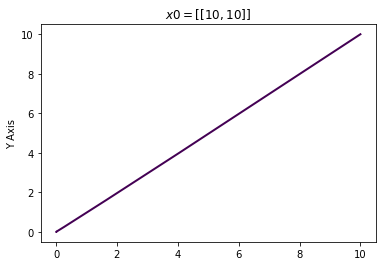

In [12]:
t1, x_t1 = solve_2D_3(A,name="task3_orbit_eq1.png",start=[[10,10]],max_time=100.0)

In [19]:

def plot_data(A,name=None ):
    Y, X = np.mgrid[-10:10:20j, -10:10:20j]
    U = A[0][0] * X + A[0][1] * Y
    V = A[1][0] * X + A[1][1] * Y
    
    fig0, ax0 = plt.subplots()
    ax0.set_aspect('equal', 'box') 
    ax0 = plt.gca()
    lim = [-10,10]
    ax0.set_xlim(lim)
    ax0.set_ylim(lim)
    
    #A = np.array([[-0.25,0],[alpha,alpha]])
    # A = np.array([[alpha,alpha],[-0.25,0]])
    eigen = la.eig(A)[0]
    eigen = np.around(eigen, decimals=2)
    
    #empty_string_label = ['']*20
    #ax0.set_xticklabels(empty_string_label)
    #ax0.set_yticklabels(empty_string_label)
    #ax0.tick_params(axis=u'both', which=u'both',length=0)
    
    ax0.quiver(X,Y,U,V,color="k", scale=None)
    '''
    if np.iscomplex(eigen).any():
        c = "r"
        start = [list(eigen)]
        strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
        title = r'$\alpha = {0}, \lambda_1 ={1}, \lambda_2 ={2}$'.format\
            (alpha,str(eigen[0]).replace('(','').replace(')', ''),\
                         str(eigen[1]).replace('(','').replace(')', ''))
    else: 
    '''
    c ="b"
    #start = list(la.eig(A)[1])
    start=[[1,1]]
    strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
    #title = r'$\alpha = {0}, \lambda_1 ={1}, \lambda_2 ={2}$'.format(alpha,str(eigen[0].real), str(eigen[1].real))
    title = 'Trajectories'
    ax0.title.set_text(title)
    #strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
    if not name is None:
        plt.savefig(name, format="png")
    plt.show()

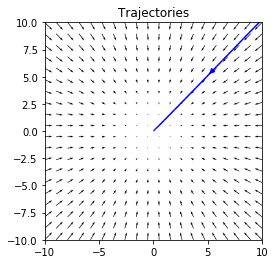

In [20]:
plot_data(A,name = 'hey.png')